# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [233]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import plotly.express as px

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.eval_measures import rmse


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [234]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [235]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [236]:
sensor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


How many rows and columns are in our data?

In [237]:
#12 columns and 1751 rows


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [238]:
time=pd.date_range(start='2018-01-01 00:00:00', end='2018-01-01 00:29:10', periods=1751)
pd.infer_freq(time)


'S'

Assign the time series index to the dataframe's index.

In [239]:
# Your code here:
sensor['time']=time
sensor=sensor.set_index('time')
sensor

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
time,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 00:29:06,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
2018-01-01 00:29:07,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
2018-01-01 00:29:08,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740


In [240]:
sensorpx=sensor.reset_index()
px.line(sensorpx, x= "time", y="userAcceleration.x")

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

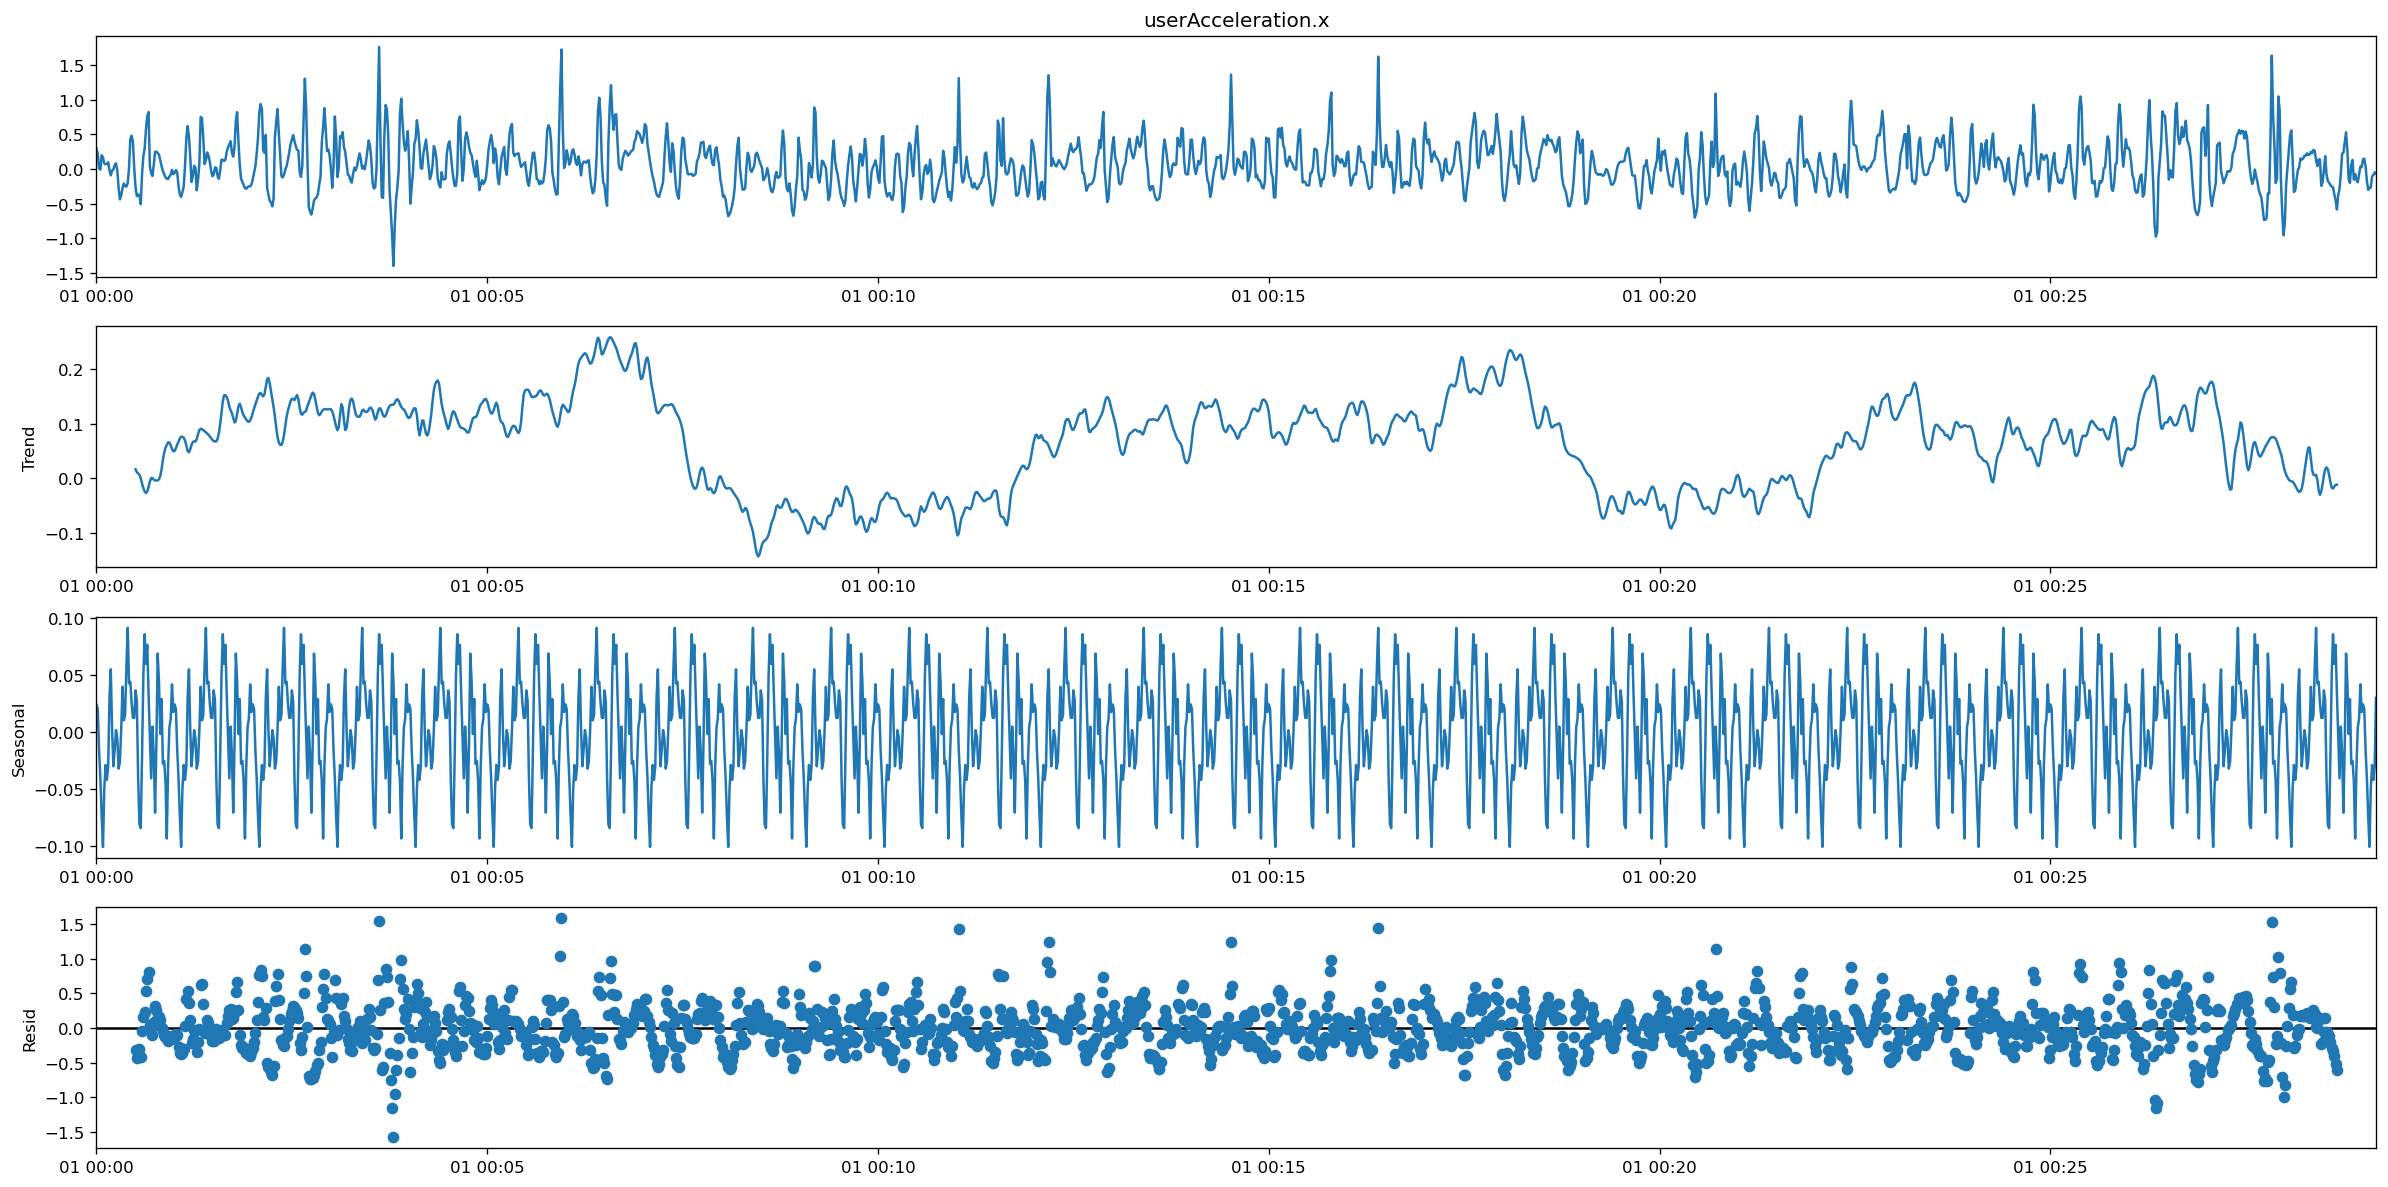

In [241]:
plt.rcParams['figure.figsize']=(20,10) 

decomposed_userAcceleration_x = sm.tsa.seasonal_decompose(sensor["userAcceleration.x"], period = 60)
decomposed_userAcceleration_x.plot();


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

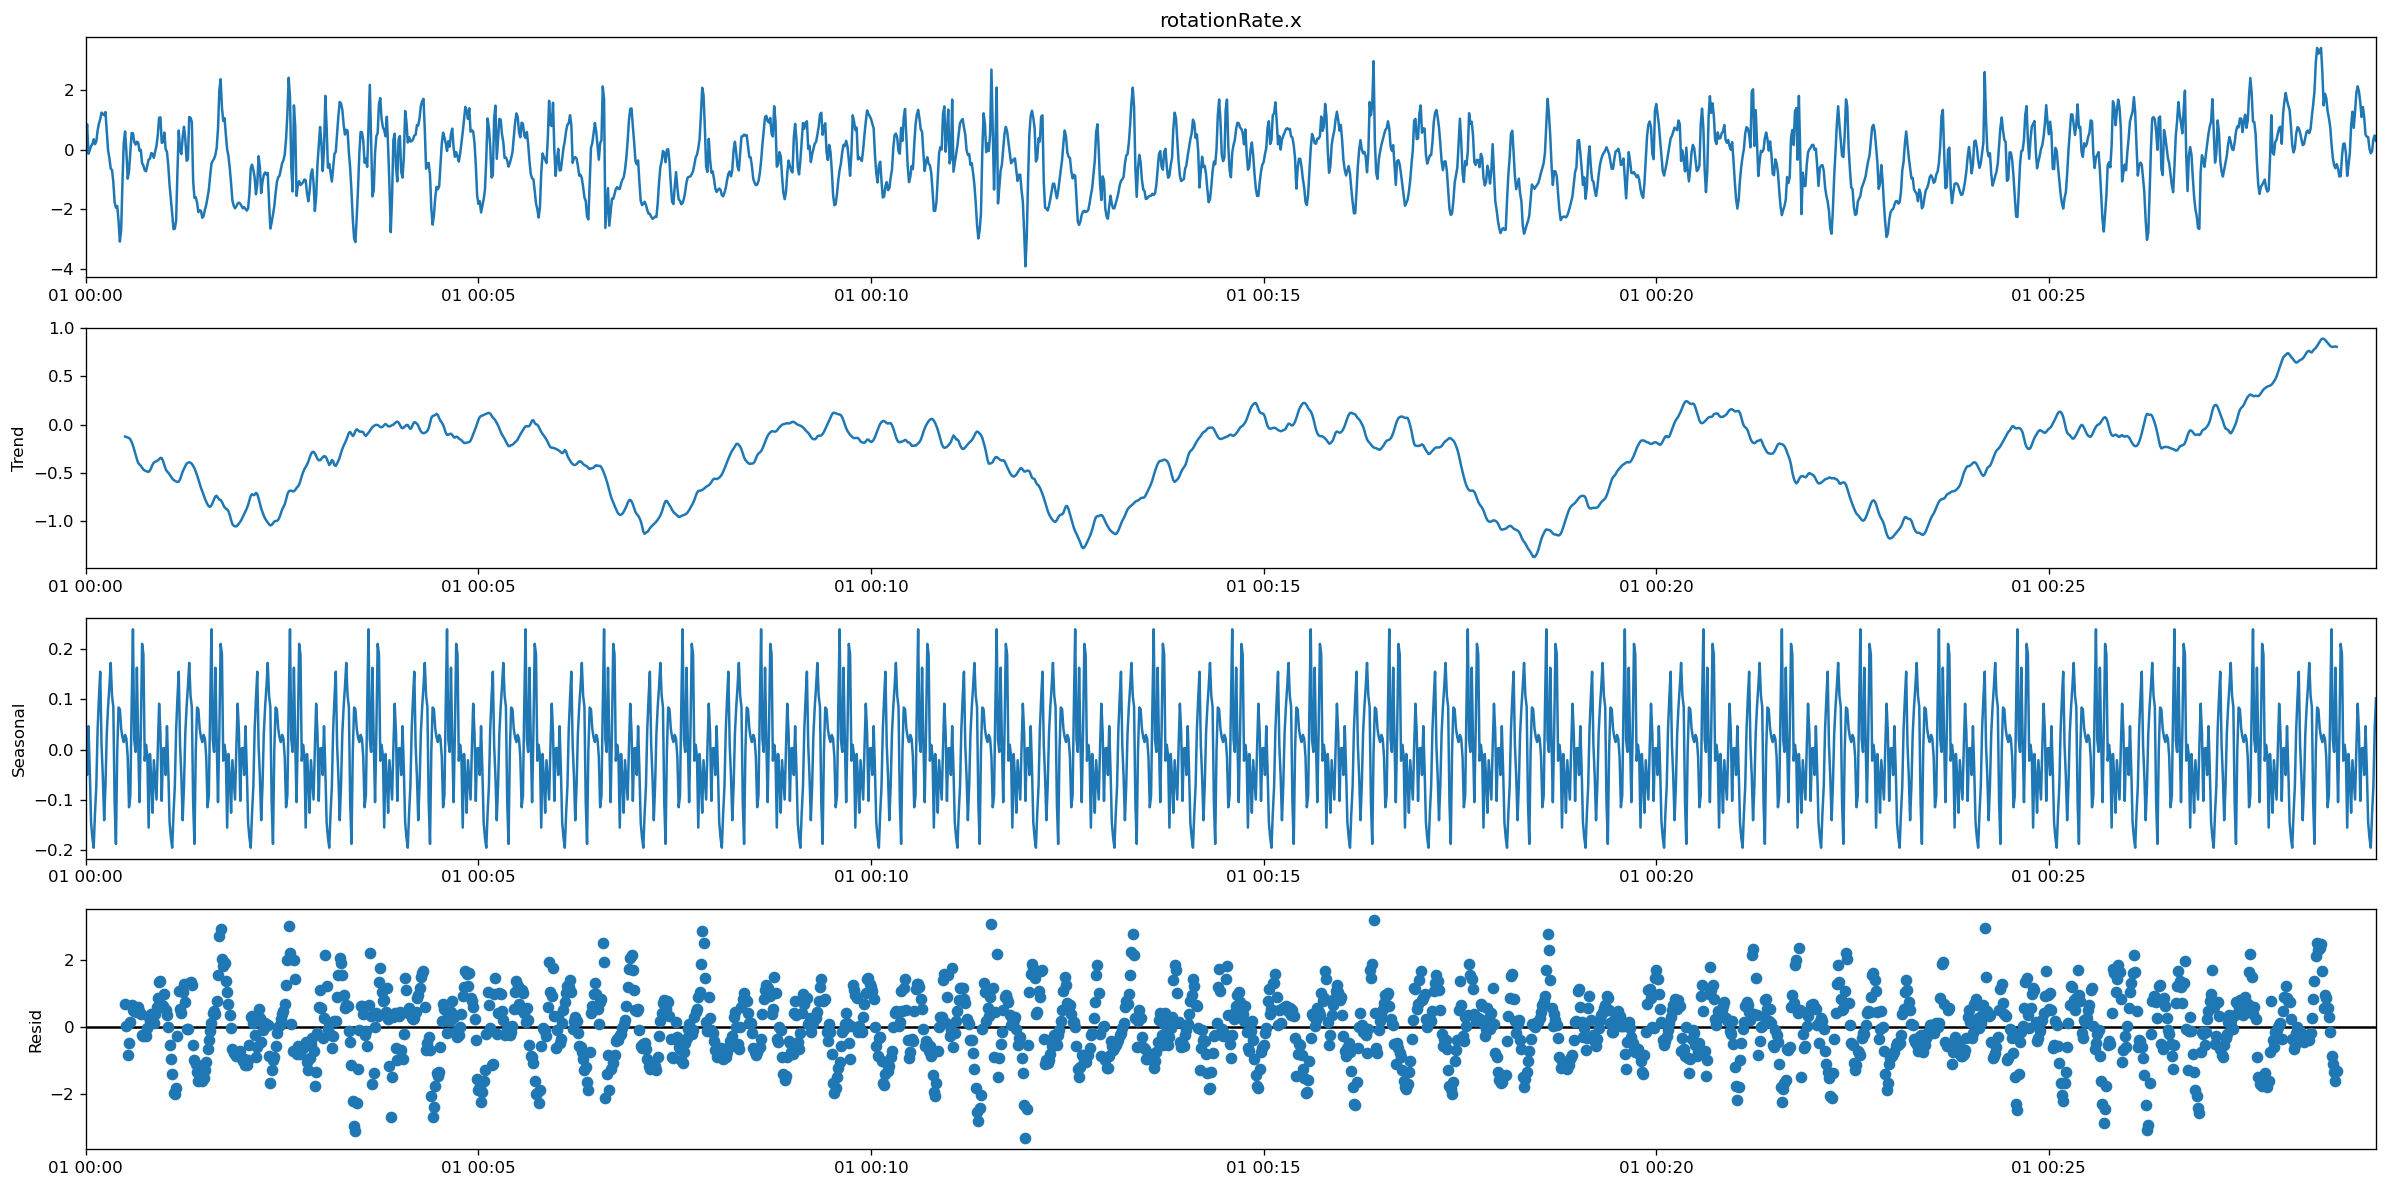

In [242]:
plt.rcParams['figure.figsize']=(20,10) 

decomposed_userAcceleration_x = sm.tsa.seasonal_decompose(sensor["rotationRate.x"], period = 60)
decomposed_userAcceleration_x.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

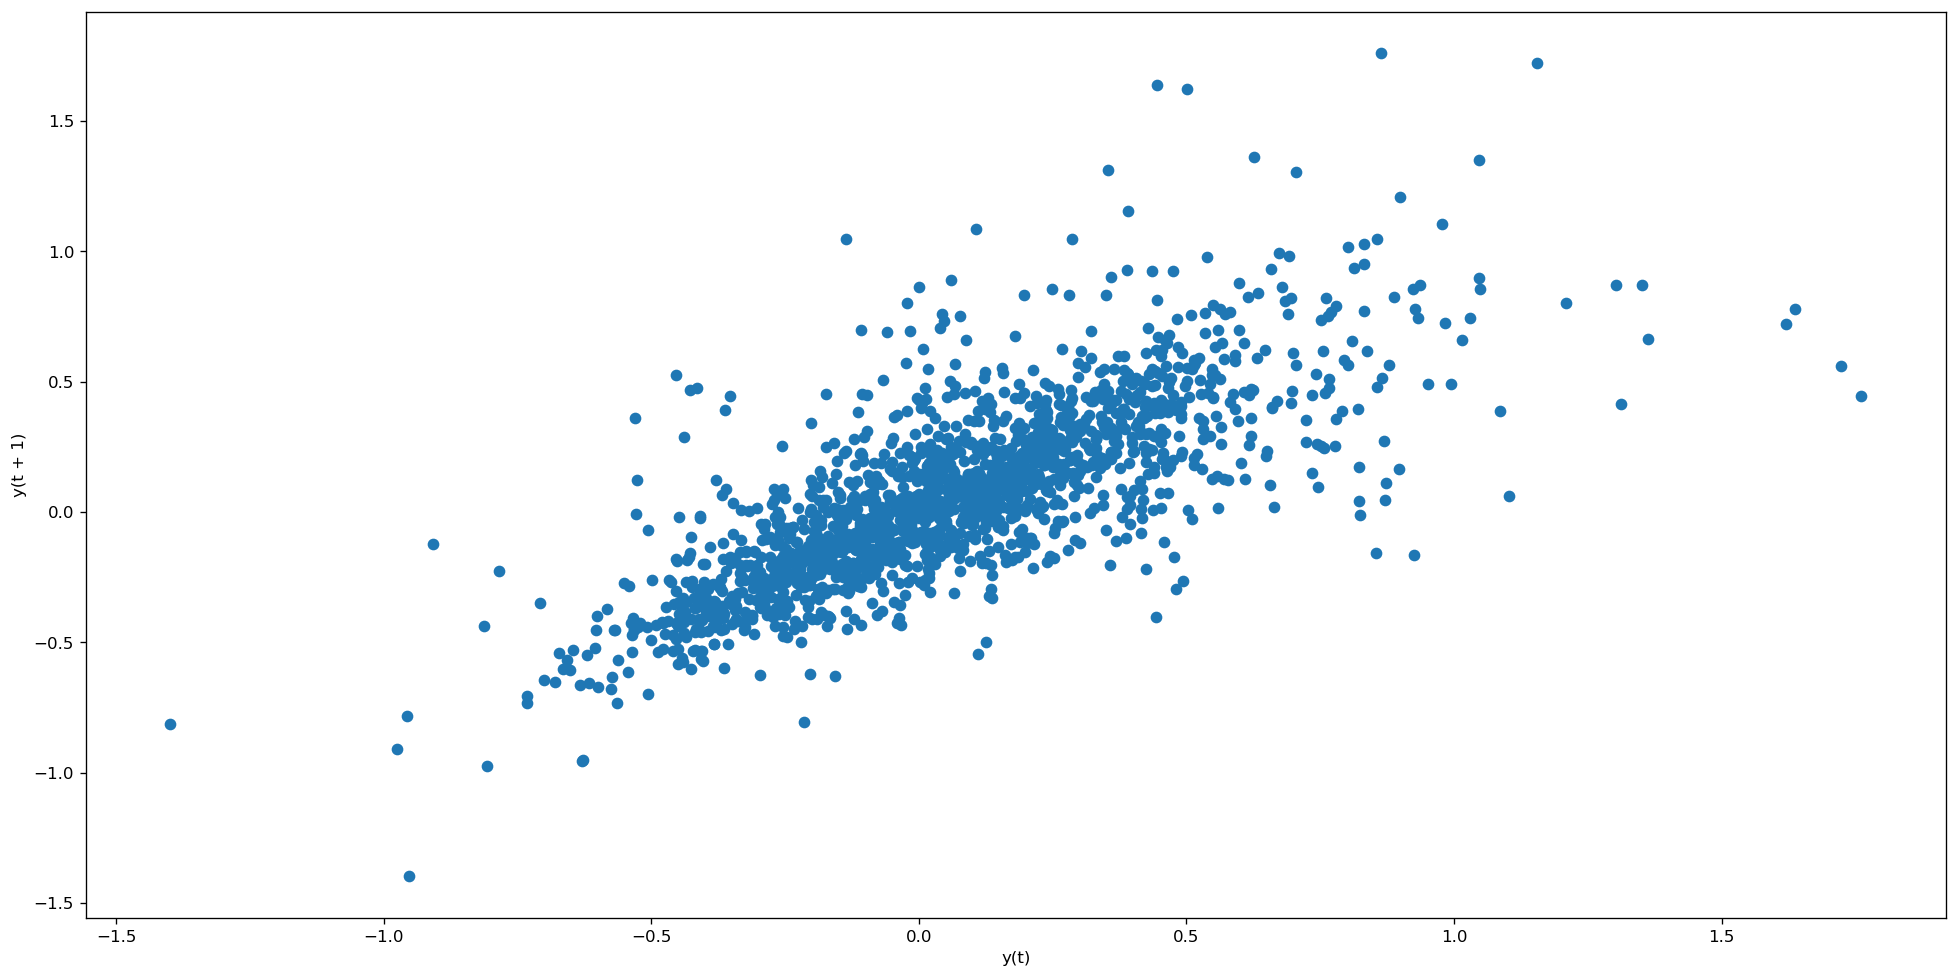

In [243]:
pd.plotting.lag_plot(sensor['userAcceleration.x']);

Create a lag plot for `rotationRate.x`

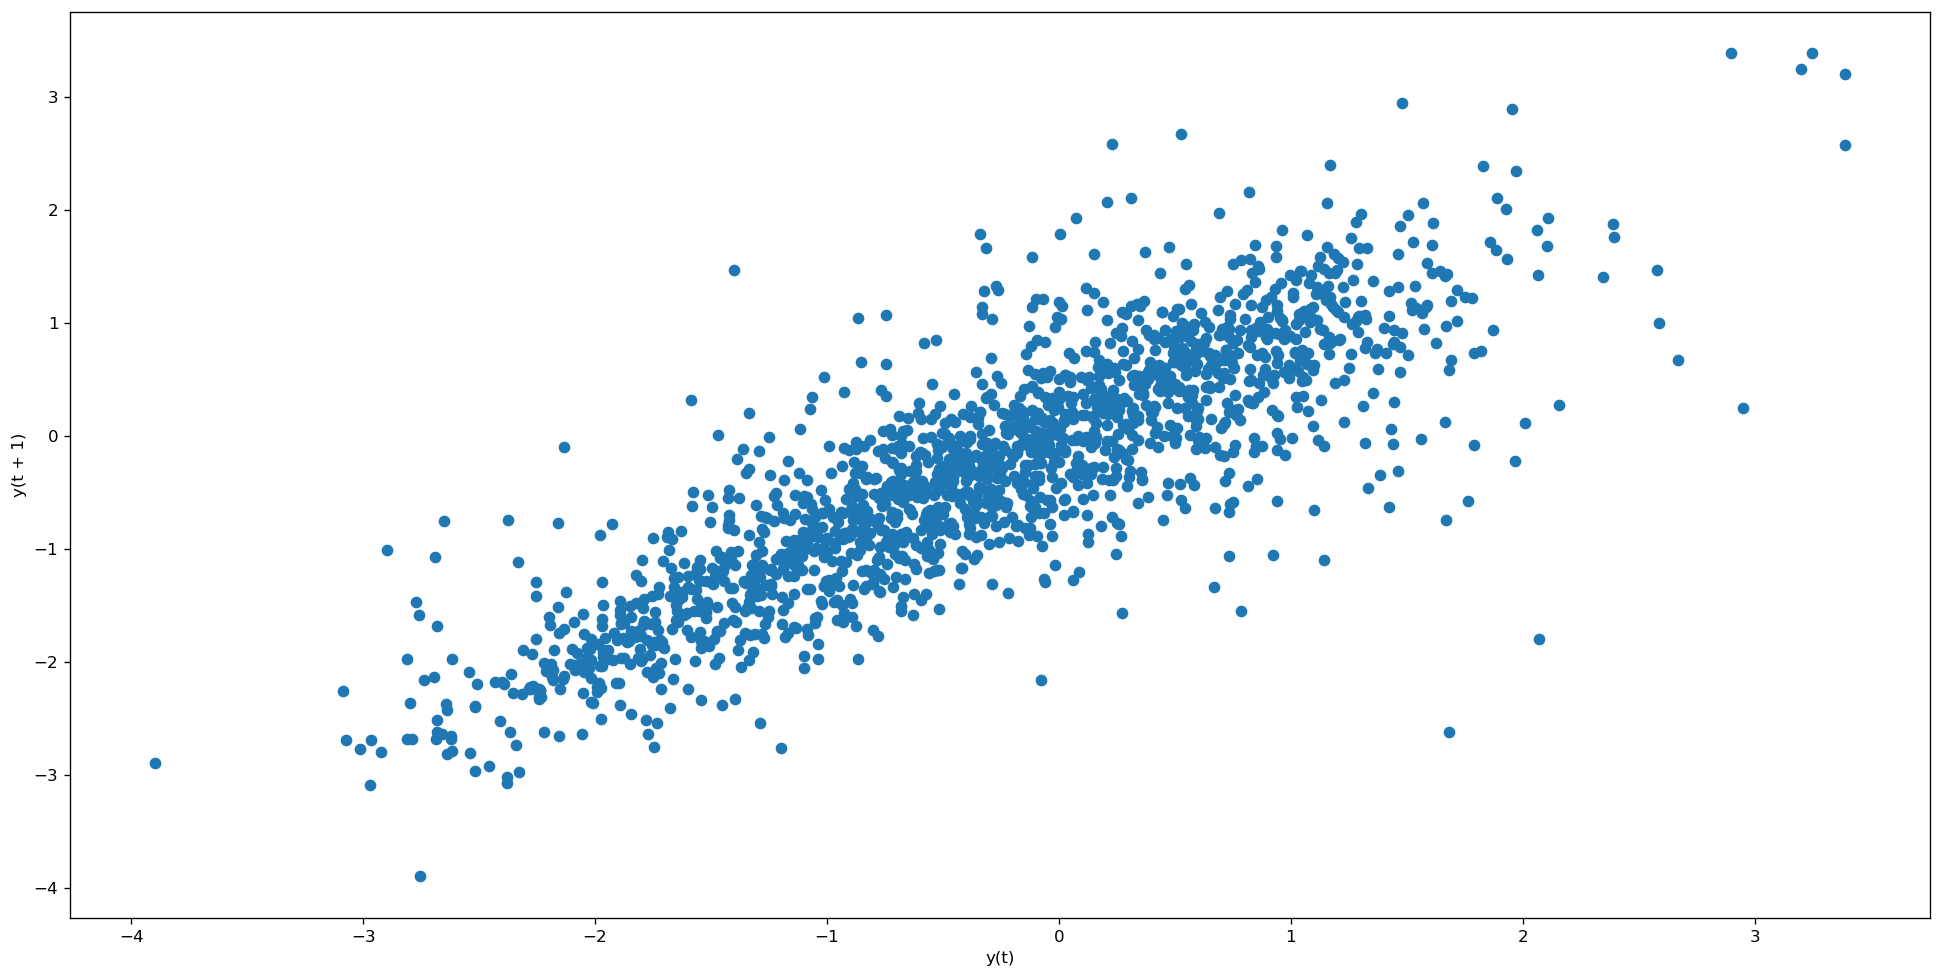

In [244]:
pd.plotting.lag_plot(sensor['rotationRate.x']);

What are your conclusions from both visualizations?

Podemos que ver que ambos en parámetros existe una cierta correlación, ya que en ambos casos se sigue una trayectoria practicamente lineal

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [245]:
#ADF Test 'userAcceleration.x'
result = adfuller (sensor['userAcceleration.x'], autolag='AIC')
print(f'ADF Statistic:{result [0]}')
print(f'ADF p-value:{result [1]}')

ADF Statistic:-17.957994086169762
ADF p-value:2.823439483037483e-30


In [246]:
#ADF Test 'rotationRate.x'
result = adfuller (sensor['rotationRate.x'], autolag='AIC')
print(f'ADF Statistic:{result [0]}')
print(f'ADF p-value:{result [1]}')


ADF Statistic:-5.269860625086418
ADF p-value:6.320230335912299e-06


What are your conclusions from this test?

En ambos casos, con Pvalue tan bajo, podemos rechazar la hipotesis nula (=no estacional) con altas probabilidades.
Por lo tanto, podriamos asegurar que ambos parámetros son estacionarios, por lo que no hace falta aplciar transformaciones sobre las series.


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



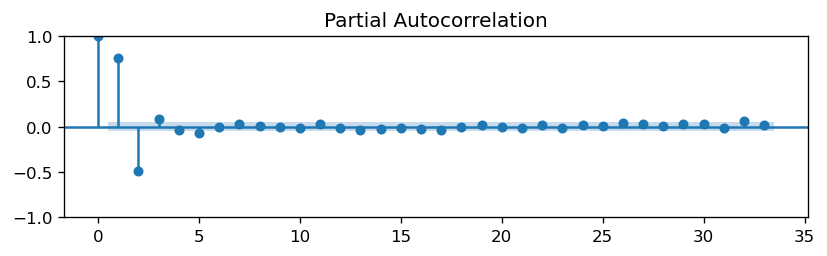

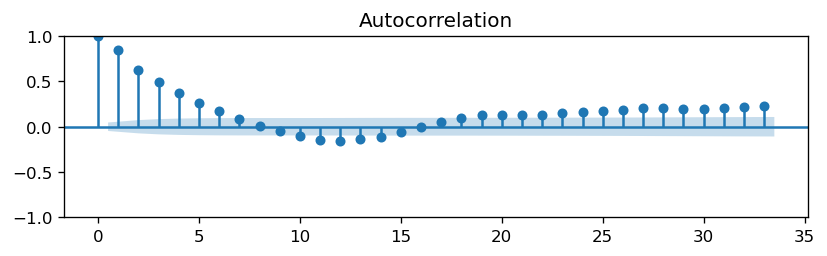

In [247]:
#### PACF y ACF
#Para calcular el parámetro 'p' y 'q' debemos observar los gráficos de la función de autocorrelación parcial y de la autocorrelación, respectivamente. Vamos a verlo con el ejemplo.

plt.rcParams.update({'figure.figsize':(8,2), 'figure.dpi':120})


plot_pacf(sensor['userAcceleration.x'])
plot_acf(sensor['rotationRate.x']);

Tal y como vemos en el grráfico, en el caso de p (primer gráfico) queda 1 lag antes del sombreado, por lo que el valor de p va a ser 1
En cuanto a q (MA), también es igual a 1 (segundo gráfico)

In [248]:
#Creamos los set de testeo y validación:
sensor_train= sensor[:-10]
sensor_test= sensor[-10:]


In [249]:
arma_mod = ARIMA(sensor_train['userAcceleration.x'], order=(2, 1, 1)).fit()
arma_mod.summary()


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency S will be used.

/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency S will be used.

/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency S will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     userAcceleration.x   No. Observations:                 1741
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 363.402
Date:                Tue, 22 Mar 2022   AIC                           -718.803
Time:                        15:32:57   BIC                           -696.957
Sample:                    01-01-2018   HQIC                          -710.725
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1230      0.012     95.212      0.000       1.100       1.146
ar.L2         -0.4874      0.016    -30.112      0.000      -0.519      -0.456
ma.L1         -0.9908      0.004   -278.816      0.000      -0.998      -0.984
sigma2         0.0385      0.001     49.813      0.000       0.037       0.040
===================================================================================
Ljung-Box (L1) (Q):                   2.63   Jarque-Bera (JB):              1938.86
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.40
Prob(H) (two-sided):                  0.63   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [250]:
#Probamos también con auto_arima, para contrastar resultados:
import pmdarima as pm

model = pm.auto_arima(sensor_train['userAcceleration.x'], start_p=1, start_q=1,
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

model.summary()

Performing stepwise search to minimize aic


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-658.073, Time=2.02 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1231.680, Time=0.18 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-262.713, Time=0.56 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-135.577, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1287.921, Time=0.08 sec


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal

/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-658.980, Time=0.27 sec


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-658.095, Time=1.21 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-656.560, Time=3.04 sec


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal

/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-135.563, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-262.016, Time=0.09 sec


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=-736.803, Time=0.38 sec


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=-735.314, Time=1.73 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=-735.299, Time=3.27 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=-734.126, Time=5.42 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=-724.865, Time=0.24 sec


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(3,0,1)(0,0,0)[12] intercept   : AIC=-734.804, Time=0.87 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-734.814, Time=0.59 sec


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning:

invalid value encountered in reciprocal



 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-723.495, Time=0.40 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=-735.741, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[12] intercept   : AIC=-733.622, Time=1.19 sec
 ARIMA(2,0,1)(0,0,0)[12]             : AIC=-719.480, Time=0.36 sec

Best model:  ARIMA(2,0,1)(0,0,0)[12] intercept
Total fit time: 23.510 seconds


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning:

invalid value encountered in reciprocal



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1741
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 373.401
Date:                Tue, 22 Mar 2022   AIC                           -736.803
Time:                        15:33:25   BIC                           -709.492
Sample:                             0   HQIC                          -726.704
                               - 1741                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0249      0.007      3.818      0.000       0.012       0.038
ar.L1          0.9883      0.036     27.630      0.000       0.918       1.058
ar.L2         -0.3788      0.033    -11.637      0.000      -0.443      -0.315
ma.L1          0.1823      0.039      4.642      0.000       0.105       0.259
sigma2         0.0381      0.001     46.070      0.000       0.036       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1776.84
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.34
Prob(H) (two-sided):                  0.60   Kurtosis:                         7.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [251]:
prediction = arma_mod.predict(start=1742, end=1751)
prediction


2018-01-01 00:29:02    0.125740
2018-01-01 00:29:03    0.079023
2018-01-01 00:29:04    0.042835
2018-01-01 00:29:05    0.024968
2018-01-01 00:29:06    0.022543
2018-01-01 00:29:07    0.028529
2018-01-01 00:29:08    0.036432
2018-01-01 00:29:09    0.042390
2018-01-01 00:29:10    0.045228
2018-01-01 00:29:11    0.045511
Freq: S, Name: predicted_mean, dtype: float64

In [259]:
#RMSE Calculation
testing_model = rmse(prediction, sensor_test['userAcceleration.x'])
testing_model

0.19581397953067065

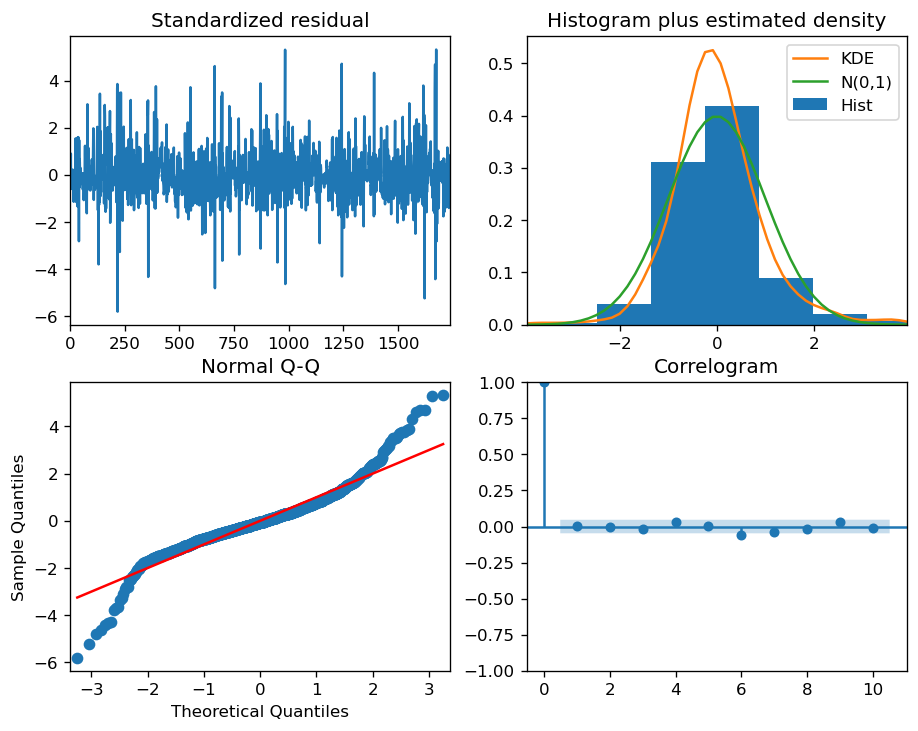

In [252]:
model.plot_diagnostics(figsize=(9,7))
plt.show()

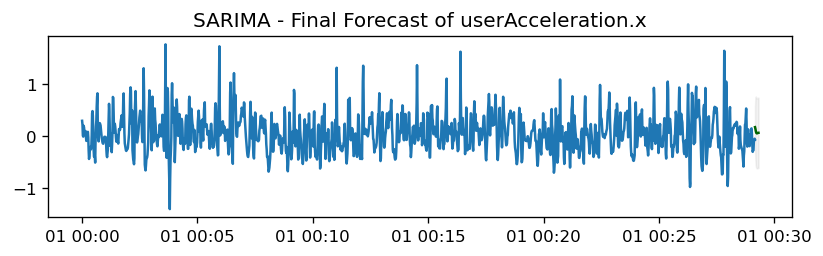

In [258]:
n_periods = 10
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(sensor.index[-1], periods = n_periods, freq='S')


# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(sensor['userAcceleration.x'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.05)

plt.title("SARIMA - Final Forecast of userAcceleration.x")
plt.show()